In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity

In [185]:
songs = pd.read_csv("./data/tracks.csv")
songs.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [186]:
songs.columns

Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [187]:
songs.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


In [188]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

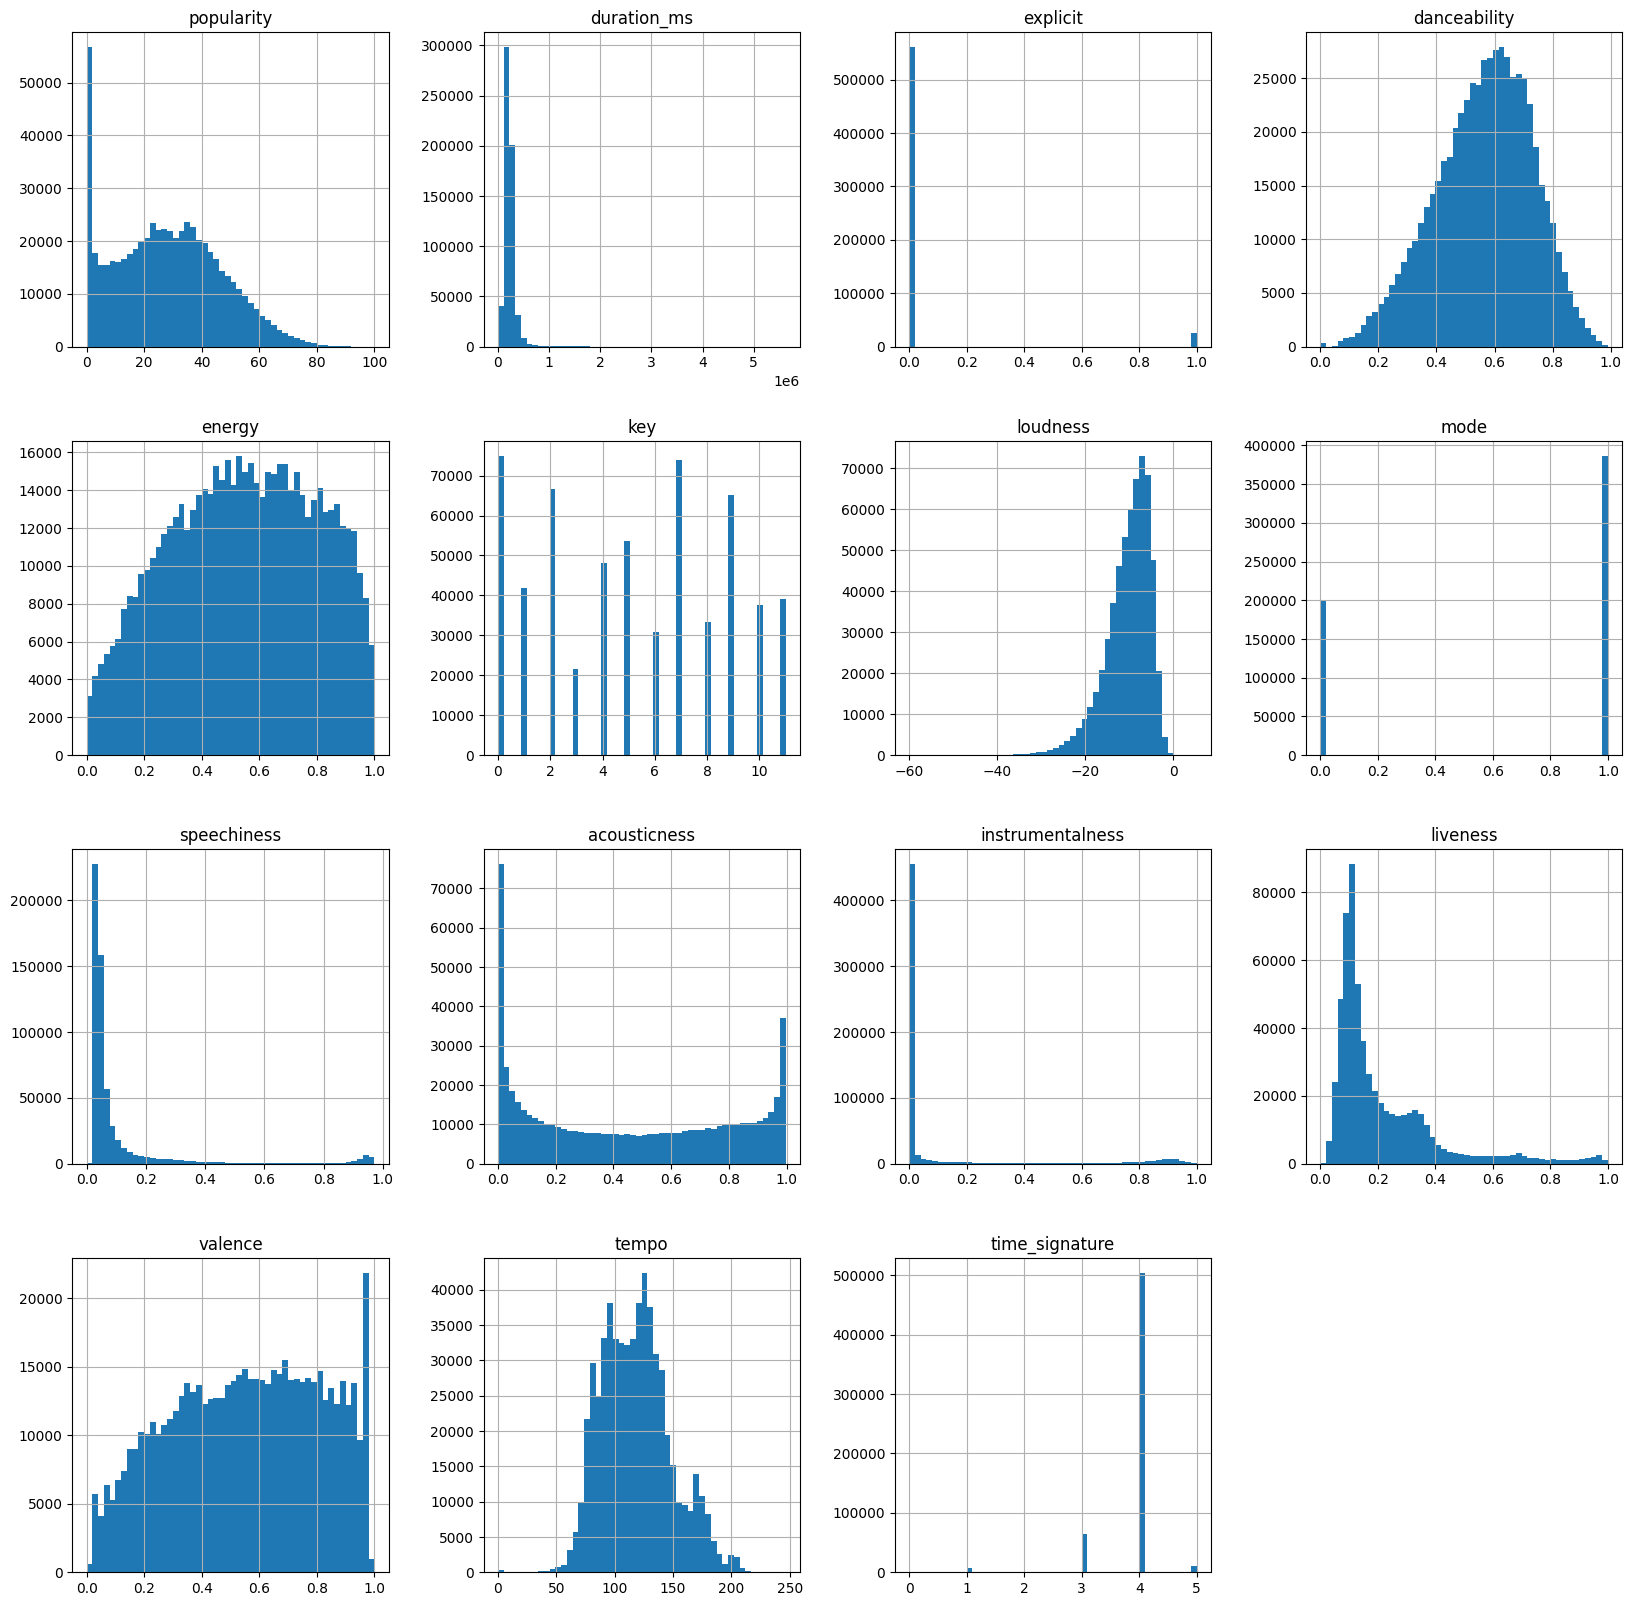

In [189]:
songs.hist(bins=50,figsize=(20,20))
plt.show()

In [190]:
songs = songs.drop_duplicates(subset=["name", "artists"], keep="first")
songs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526610 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                526610 non-null  object 
 1   name              526609 non-null  object 
 2   popularity        526610 non-null  int64  
 3   duration_ms       526610 non-null  int64  
 4   explicit          526610 non-null  int64  
 5   artists           526610 non-null  object 
 6   id_artists        526610 non-null  object 
 7   release_date      526610 non-null  object 
 8   danceability      526610 non-null  float64
 9   energy            526610 non-null  float64
 10  key               526610 non-null  int64  
 11  loudness          526610 non-null  float64
 12  mode              526610 non-null  int64  
 13  speechiness       526610 non-null  float64
 14  acousticness      526610 non-null  float64
 15  instrumentalness  526610 non-null  float64
 16  liveness          52

In [191]:
songs['date'] = pd.to_datetime(songs['release_date'])

In [192]:
songs

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,date
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,...,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3,1922-02-22
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,...,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1,1922-06-01
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,...,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5,1922-03-21
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,...,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3,1922-03-21
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,...,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4,1922-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,...,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4,2020-09-26
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,...,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4,2020-10-21
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,...,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4,2020-09-02
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,...,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4,2021-03-05


In [193]:
songs['date']=pd.DatetimeIndex(songs['date']).year

In [194]:
songs=songs.sort_values(by=['date'])

In [195]:
songs.drop(['time_signature','mode','date','duration_ms','explicit', 'id_artists','release_date', 'key' ], inplace=True, axis=1)
songs.head()

,id,name,popularity,artists,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
478627,74CSJTE5QQp1e4bHzm3wti,Maldita sea la primera vez,19,['Los Pincheira del Sur'],0.659,0.791,-4.895,0.0295,0.139,0.000002,0.161,0.956,141.999
0,35iwgR4jXetI318WEWsa1Q,Carve,6,['Uli'],0.645,0.445,-13.338,0.4510,0.674,0.744000,0.151,0.127,104.851
132319,189f2SggTpVVCwZClb6EhG,Give me your affection,0,"['Abe Lyman’s Orchestra', 'Abe Lyman']",0.499,0.320,-8.596,0.0543,0.982,0.442000,0.112,0.875,126.431
132320,19rRSxk9XaoynlV5rXFWxS,Mary lou,0,"['Abe Lyman’s Orchestra', 'Abe Lyman']",0.271,0.626,-5.018,0.0914,0.918,0.014900,0.344,0.817,205.549
132321,1FkOrRGMLlsYclSH4ICYQ8,Mighty blue,0,"['Abe Lyman’s Orchestra', 'Abe Lyman']",0.691,0.450,-5.916,0.0365,0.995,0.000948,0.107,0.620,108.188


In [196]:
songs["artists"] = songs["artists"].map(lambda x: x.split(', ')[0])
songs["artists"] = songs["artists"].map(lambda x: x.replace(']', ""))
songs["artists"] = songs["artists"].map(lambda x: x.replace('[', ""))
songs["artists"] = songs["artists"].map(lambda x: x.replace('\'', ""))
songs["artists"] = songs["artists"].map(lambda x: x.replace('\(', ""))
songs["artists"] = songs["artists"].map(lambda x: x.replace('\)', ""))


In [197]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526610 entries, 478627 to 353110
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                526610 non-null  object 
 1   name              526609 non-null  object 
 2   popularity        526610 non-null  int64  
 3   artists           526610 non-null  object 
 4   danceability      526610 non-null  float64
 5   energy            526610 non-null  float64
 6   loudness          526610 non-null  float64
 7   speechiness       526610 non-null  float64
 8   acousticness      526610 non-null  float64
 9   instrumentalness  526610 non-null  float64
 10  liveness          526610 non-null  float64
 11  valence           526610 non-null  float64
 12  tempo             526610 non-null  float64
dtypes: float64(9), int64(1), object(3)
memory usage: 56.2+ MB


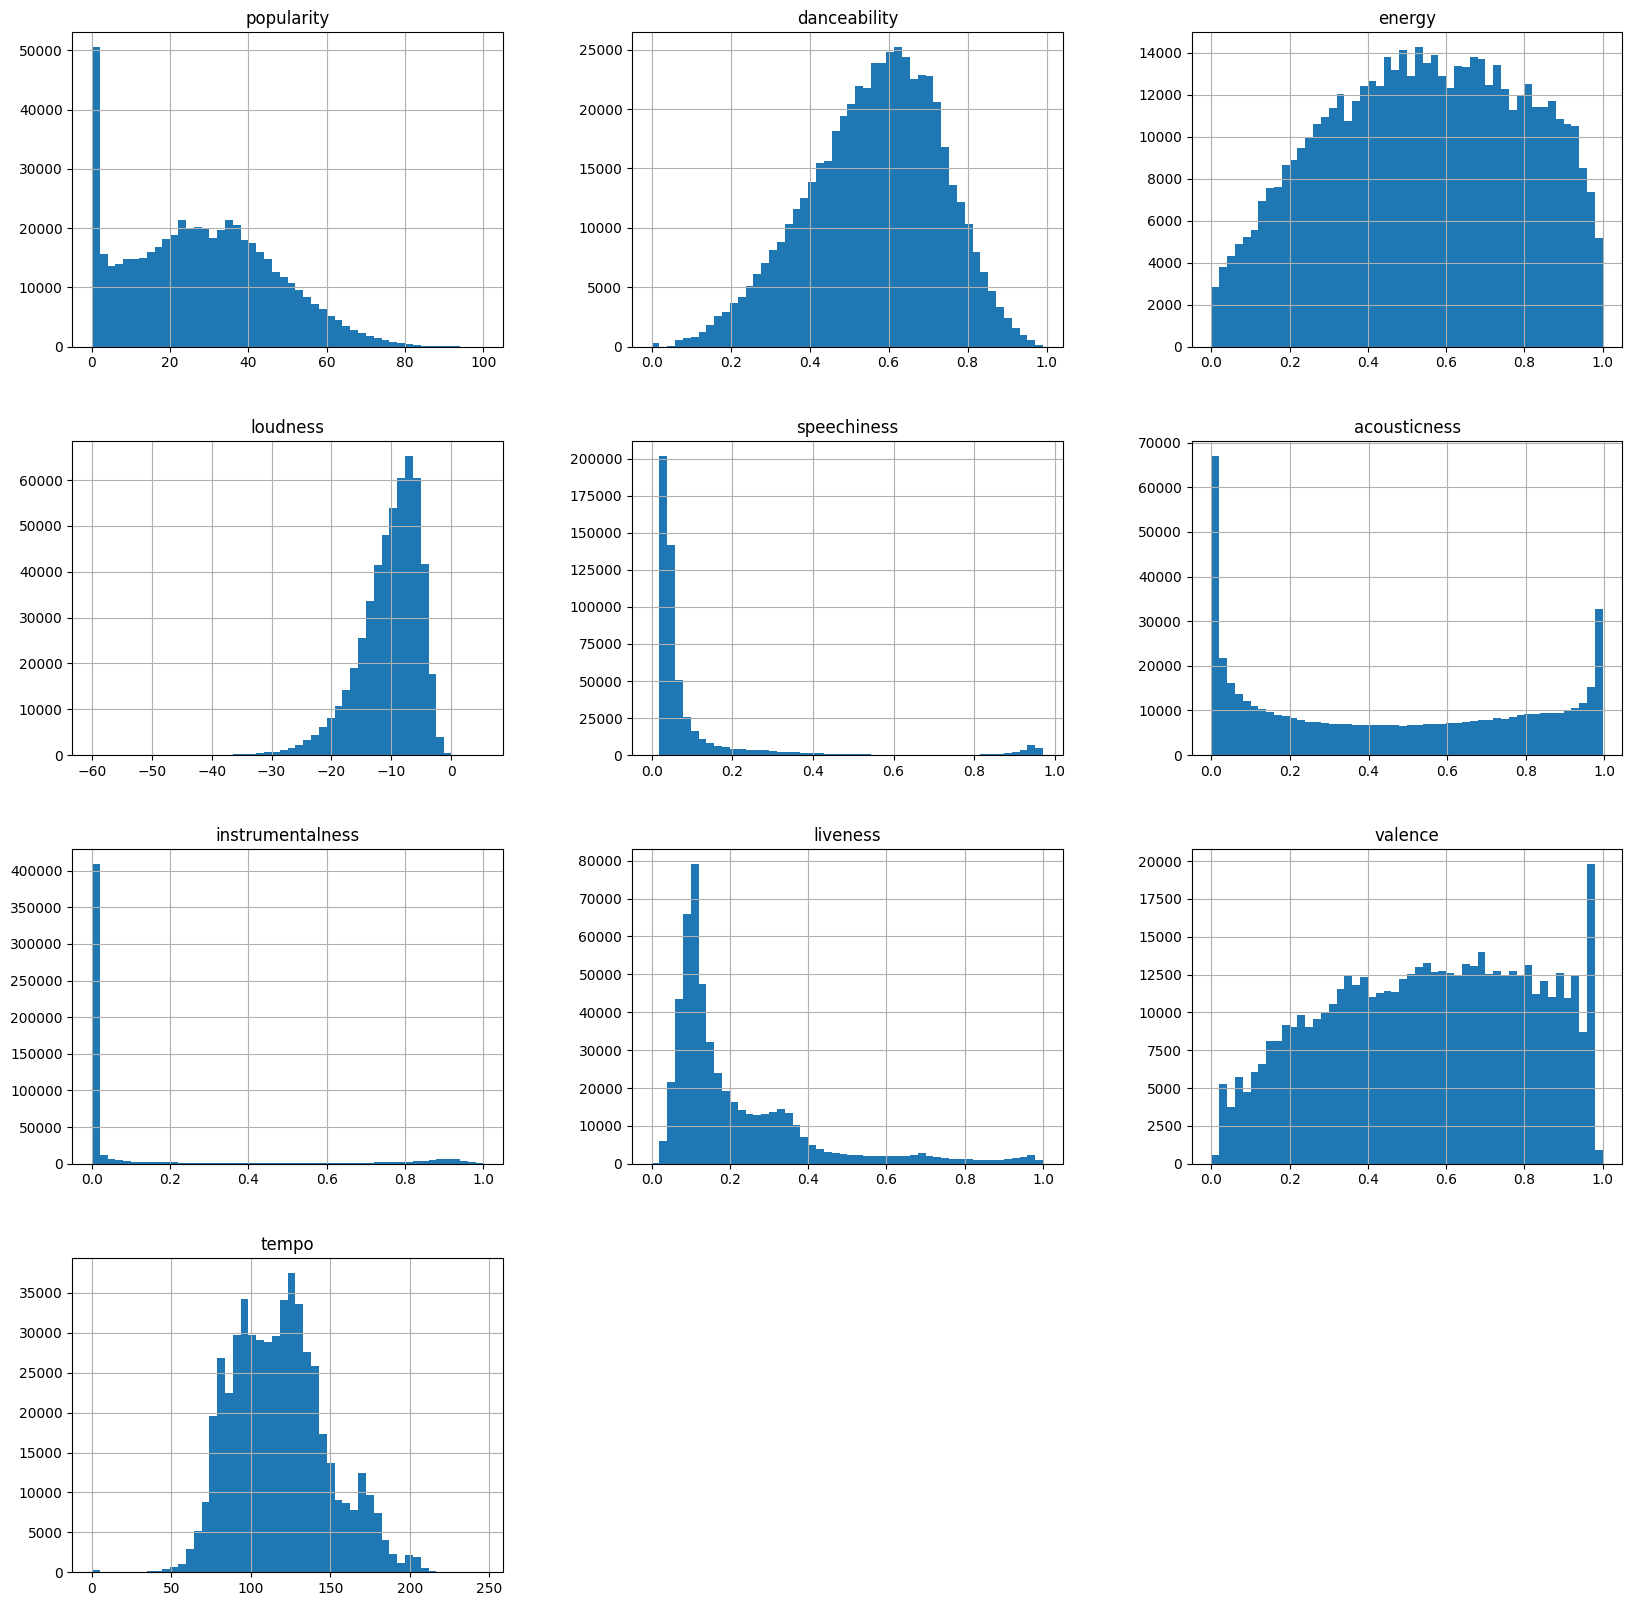

In [198]:
songs.hist(bins=50,figsize=(20,20))
plt.show()

In [199]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler(feature_range=(-1,1))
col=['popularity','danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','tempo']
songs[col]=min_max_scaler.fit_transform(songs[col])

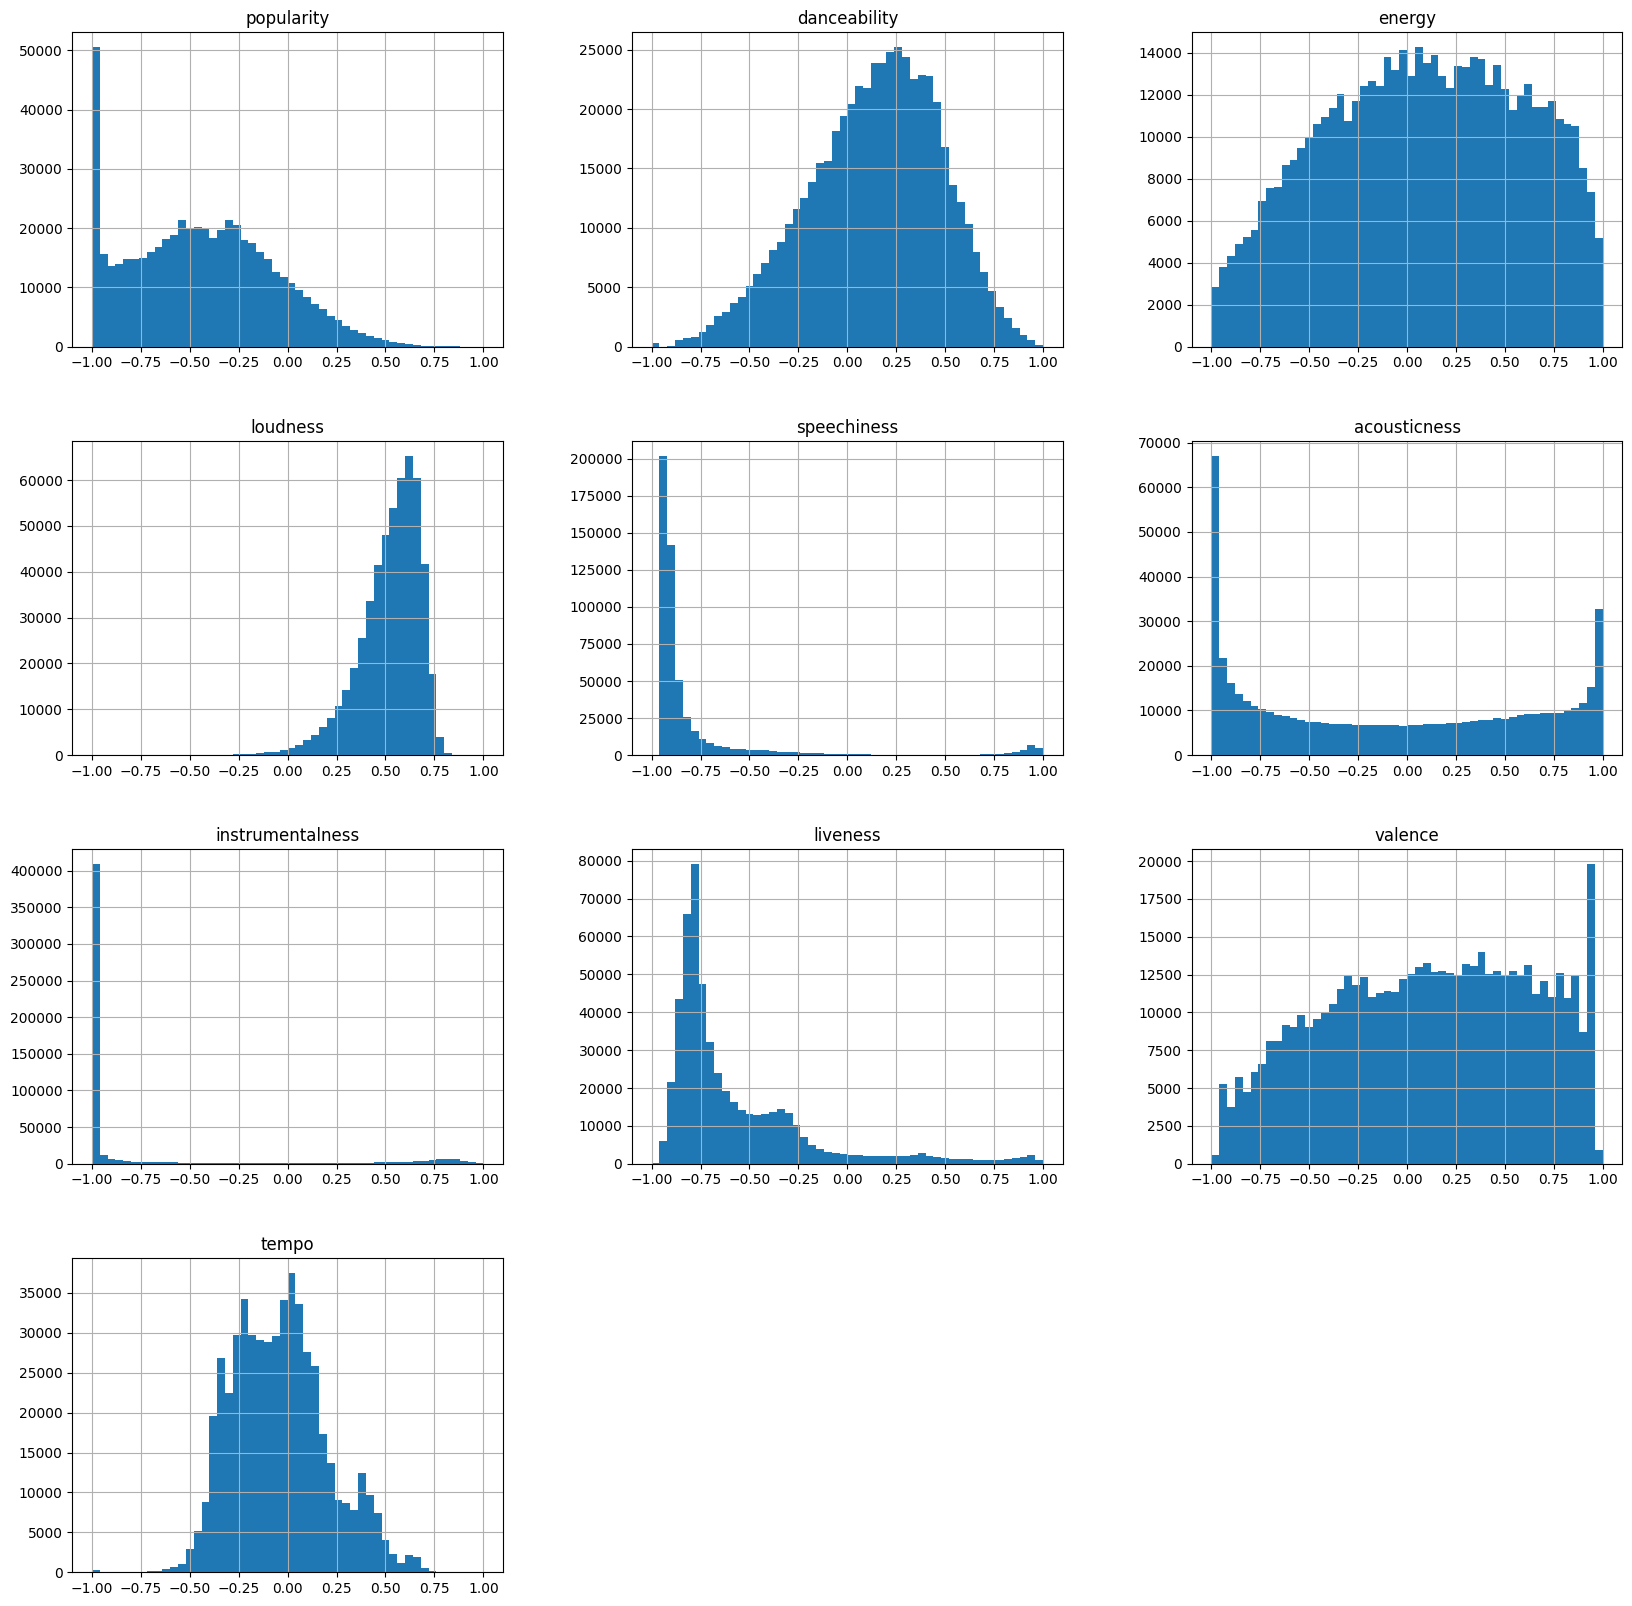

In [200]:
songs.hist(bins=50,figsize=(20,20))
plt.show()

/tmp/ipykernel_16906/863163807.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(songs.corr(), annot=True)


<AxesSubplot: >

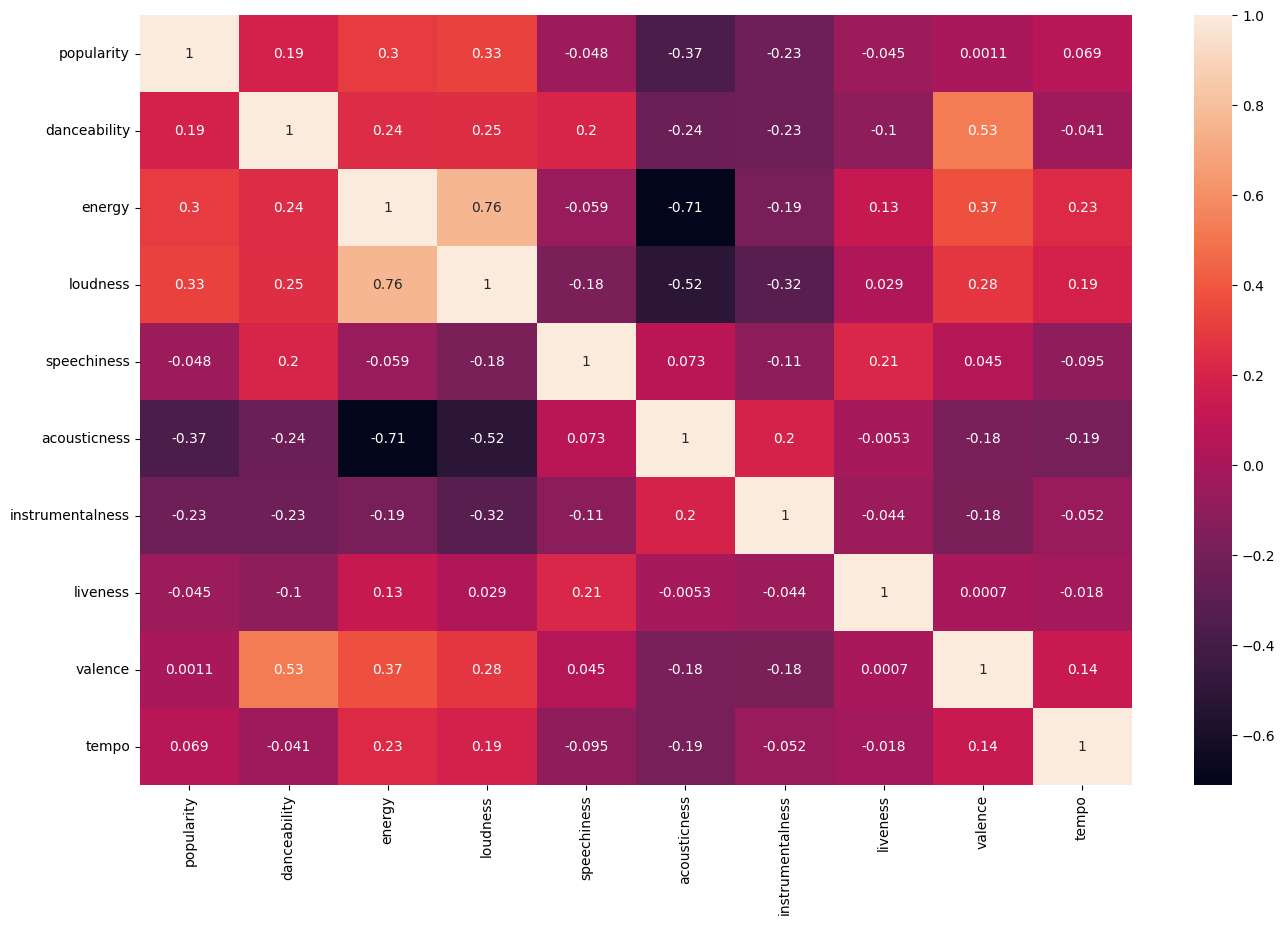

In [201]:
plt.figure(figsize=(16, 10))
sns.heatmap(songs.corr(), annot=True)

In [206]:
songs
songs['image_id']=''
songs

,id,name,popularity,artists,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,image_id
478627,74CSJTE5QQp1e4bHzm3wti,Maldita sea la primera vez,-0.62,Los Pincheira del Sur,0.329970,0.582,0.685787,-0.939238,-0.720884,-0.999997,-0.6780,0.9120,0.152678,
0,35iwgR4jXetI318WEWsa1Q,Carve,-0.88,Uli,0.301715,-0.110,0.427496,-0.071061,0.353414,0.488000,-0.6980,-0.7460,-0.148871,
132319,189f2SggTpVVCwZClb6EhG,Give me your affection,-1.00,Abe Lyman’s Orchestra,0.007064,-0.360,0.572565,-0.888157,0.971888,-0.116000,-0.7760,0.7500,0.026305,
132320,19rRSxk9XaoynlV5rXFWxS,Mary lou,-1.00,Abe Lyman’s Orchestra,-0.453078,0.252,0.682024,-0.811740,0.843373,-0.970200,-0.3120,0.6340,0.668546,
132321,1FkOrRGMLlsYclSH4ICYQ8,Mighty blue,-1.00,Abe Lyman’s Orchestra,0.394551,-0.100,0.654552,-0.924820,0.997992,-0.998104,-0.7860,0.2400,-0.121783,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310548,2rDYl78cr74CS5D8ytX15c,Loving Kindness,-1.00,Chinese Relaxation and Meditation,-0.378406,-0.222,0.150606,-0.912049,0.672691,0.880000,-0.7980,-0.3280,-0.333260,
310549,4yZPFiKeaw6tWdncc1dvvS,Self Control,-1.00,Chinese Relaxation and Meditation,-0.521695,-0.796,0.303292,-0.913285,0.919679,0.744000,-0.8036,-0.9282,-0.573790,
74069,0wpK3PsDCtiJAfFTFBEN5z,6 HOUNDS,-1.00,BOPGANG3000,0.200807,0.724,0.639960,-0.307930,-0.948193,-0.340000,-0.7660,0.0100,0.136557,
73993,04HyIVNITWaae4heVleRqJ,Smell Like Piss - Edit,-0.98,BuckHolmes,0.765893,-0.282,0.403940,-0.799588,-0.963253,-0.996580,-0.8180,0.7680,0.104273,


In [207]:
for i in range (len(songs['id'])):
    songs['image_id'][i]=sp.track(songs['id'][i])['album']['images'][0]['url']

/tmp/ipykernel_16906/4210766240.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs['image_id'][i]=sp.track(songs['id'][i])['album']['images'][0]['url']


KeyError: 121

In [176]:
songs

,id,name,popularity,artists,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,image_id
478627,74CSJTE5QQp1e4bHzm3wti,Maldita sea la primera vez,-0.62,Los Pincheira del Sur,0.329970,0.582,0.685787,-0.939238,-0.720884,-0.999997,-0.6780,0.9120,0.152678,https://i.scdn.co/image/ab67616d0000b2731367e2...
0,35iwgR4jXetI318WEWsa1Q,Carve,-0.88,Uli,0.301715,-0.110,0.427496,-0.071061,0.353414,0.488000,-0.6980,-0.7460,-0.148871,https://i.scdn.co/image/ab67616d0000b2731367e2...
132319,189f2SggTpVVCwZClb6EhG,Give me your affection,-1.00,Abe Lyman’s Orchestra,0.007064,-0.360,0.572565,-0.888157,0.971888,-0.116000,-0.7760,0.7500,0.026305,https://i.scdn.co/image/ab67616d0000b2731367e2...
132320,19rRSxk9XaoynlV5rXFWxS,Mary lou,-1.00,Abe Lyman’s Orchestra,-0.453078,0.252,0.682024,-0.811740,0.843373,-0.970200,-0.3120,0.6340,0.668546,https://i.scdn.co/image/ab67616d0000b2731367e2...
132321,1FkOrRGMLlsYclSH4ICYQ8,Mighty blue,-1.00,Abe Lyman’s Orchestra,0.394551,-0.100,0.654552,-0.924820,0.997992,-0.998104,-0.7860,0.2400,-0.121783,https://i.scdn.co/image/ab67616d0000b2731367e2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310548,2rDYl78cr74CS5D8ytX15c,Loving Kindness,-1.00,Chinese Relaxation and Meditation,-0.378406,-0.222,0.150606,-0.912049,0.672691,0.880000,-0.7980,-0.3280,-0.333260,https://i.scdn.co/image/ab67616d0000b2731367e2...
310549,4yZPFiKeaw6tWdncc1dvvS,Self Control,-1.00,Chinese Relaxation and Meditation,-0.521695,-0.796,0.303292,-0.913285,0.919679,0.744000,-0.8036,-0.9282,-0.573790,https://i.scdn.co/image/ab67616d0000b2731367e2...
74069,0wpK3PsDCtiJAfFTFBEN5z,6 HOUNDS,-1.00,BOPGANG3000,0.200807,0.724,0.639960,-0.307930,-0.948193,-0.340000,-0.7660,0.0100,0.136557,https://i.scdn.co/image/ab67616d0000b2731367e2...
73993,04HyIVNITWaae4heVleRqJ,Smell Like Piss - Edit,-0.98,BuckHolmes,0.765893,-0.282,0.403940,-0.799588,-0.963253,-0.996580,-0.8180,0.7680,0.104273,https://i.scdn.co/image/ab67616d0000b2731367e2...


In [6]:
songs.to_csv('./data/new.csv')

NameError: name 'songs' is not defined

In [7]:
df=pd.read_csv('./data/new.csv')

In [3]:
df

,Unnamed: 0,id,name,popularity,artists,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,478627,74CSJTE5QQp1e4bHzm3wti,Maldita sea la primera vez,-0.62,Los Pincheira del Sur,0.329970,0.582,0.685787,-0.939238,-0.720884,-0.999997,-0.6780,0.9120,0.152678
1,0,35iwgR4jXetI318WEWsa1Q,Carve,-0.88,Uli,0.301715,-0.110,0.427496,-0.071061,0.353414,0.488000,-0.6980,-0.7460,-0.148871
2,132319,189f2SggTpVVCwZClb6EhG,Give me your affection,-1.00,Abe Lyman’s Orchestra,0.007064,-0.360,0.572565,-0.888157,0.971888,-0.116000,-0.7760,0.7500,0.026305
3,132320,19rRSxk9XaoynlV5rXFWxS,Mary lou,-1.00,Abe Lyman’s Orchestra,-0.453078,0.252,0.682024,-0.811740,0.843373,-0.970200,-0.3120,0.6340,0.668546
4,132321,1FkOrRGMLlsYclSH4ICYQ8,Mighty blue,-1.00,Abe Lyman’s Orchestra,0.394551,-0.100,0.654552,-0.924820,0.997992,-0.998104,-0.7860,0.2400,-0.121783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526605,310548,2rDYl78cr74CS5D8ytX15c,Loving Kindness,-1.00,Chinese Relaxation and Meditation,-0.378406,-0.222,0.150606,-0.912049,0.672691,0.880000,-0.7980,-0.3280,-0.333260
526606,310549,4yZPFiKeaw6tWdncc1dvvS,Self Control,-1.00,Chinese Relaxation and Meditation,-0.521695,-0.796,0.303292,-0.913285,0.919679,0.744000,-0.8036,-0.9282,-0.573790
526607,74069,0wpK3PsDCtiJAfFTFBEN5z,6 HOUNDS,-1.00,BOPGANG3000,0.200807,0.724,0.639960,-0.307930,-0.948193,-0.340000,-0.7660,0.0100,0.136557
526608,73993,04HyIVNITWaae4heVleRqJ,Smell Like Piss - Edit,-0.98,BuckHolmes,0.765893,-0.282,0.403940,-0.799588,-0.963253,-0.996580,-0.8180,0.7680,0.104273


In [4]:
df=df[0:100000]

In [5]:
df.to_csv('./data/new.csv')

In [ ]:
songs

,id,name,popularity,artists,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
478627,74CSJTE5QQp1e4bHzm3wti,Maldita sea la primera vez,-0.62,Los Pincheira del Sur,0.329970,0.582,0.685787,-0.939238,-0.720884,-0.999997,-0.6780,0.9120,0.152678
0,35iwgR4jXetI318WEWsa1Q,Carve,-0.88,Uli,0.301715,-0.110,0.427496,-0.071061,0.353414,0.488000,-0.6980,-0.7460,-0.148871
132319,189f2SggTpVVCwZClb6EhG,Give me your affection,-1.00,Abe Lyman’s Orchestra,0.007064,-0.360,0.572565,-0.888157,0.971888,-0.116000,-0.7760,0.7500,0.026305
132320,19rRSxk9XaoynlV5rXFWxS,Mary lou,-1.00,Abe Lyman’s Orchestra,-0.453078,0.252,0.682024,-0.811740,0.843373,-0.970200,-0.3120,0.6340,0.668546
132321,1FkOrRGMLlsYclSH4ICYQ8,Mighty blue,-1.00,Abe Lyman’s Orchestra,0.394551,-0.100,0.654552,-0.924820,0.997992,-0.998104,-0.7860,0.2400,-0.121783
...,...,...,...,...,...,...,...,...,...,...,...,...,...
310548,2rDYl78cr74CS5D8ytX15c,Loving Kindness,-1.00,Chinese Relaxation and Meditation,-0.378406,-0.222,0.150606,-0.912049,0.672691,0.880000,-0.7980,-0.3280,-0.333260
310549,4yZPFiKeaw6tWdncc1dvvS,Self Control,-1.00,Chinese Relaxation and Meditation,-0.521695,-0.796,0.303292,-0.913285,0.919679,0.744000,-0.8036,-0.9282,-0.573790
74069,0wpK3PsDCtiJAfFTFBEN5z,6 HOUNDS,-1.00,BOPGANG3000,0.200807,0.724,0.639960,-0.307930,-0.948193,-0.340000,-0.7660,0.0100,0.136557
73993,04HyIVNITWaae4heVleRqJ,Smell Like Piss - Edit,-0.98,BuckHolmes,0.765893,-0.282,0.403940,-0.799588,-0.963253,-0.996580,-0.8180,0.7680,0.104273


In [ ]:
songs['indexes']=songs['name'].str.contains('me your',0)
searching=songs[songs['indexes']==True]

In [226]:
sp.playlist('37i9dQZEVXbLZ52XmnySJg')['tracks']['items'][0]['track']['name']

'Kahani Suno 2.0'

In [235]:
sp.playlist('37i9dQZEVXbLZ52XmnySJg')['tracks']['items'][0]['track']['id']

'4VsP4Dm8gsibRxB5I2hEkw'

In [241]:
sp.track(sp.playlist('37i9dQZEVXbLZ52XmnySJg')['tracks']['items'][1]['track']['id'])['album']['images'][0]['url']

'https://i.scdn.co/image/ab67616d0000b27337f65266754703fd20d29854'

In [239]:
sp.playlist('37i9dQZEVXbLZ52XmnySJg')['tracks']['items'][0]['track']['artists'][0]['name']

'Kaifi Khalil'

In [ ]:
songs.iloc[1]['id']

'35iwgR4jXetI318WEWsa1Q'

In [ ]:
def generate_playlist_recos(df,dft):
    df=df.drop(['id','name','artists','indexes'], axis = 1)
    # df=df.drop('sim',axis=1)
    dft=dft.drop(['id','name','artists','indexes'])
    df['sim'] = cosine_similarity(df.values, dft.values.reshape(1, -1))
    return df['sim']

songt=songs.iloc[5]

In [ ]:
songs['sim'] = generate_playlist_recos(songs, songt)

In [ ]:
sugg=songs.sort_values(by=['sim']).tail(10)

In [ ]:
sugg

,id,name,popularity,artists,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,indexes,sim
17304,43uVDrTk4wkoOTOl5hkT4S,"10 Preludes, Op. 23: No. 2 in B-Flat Major: Ma...",-1.00,Sergei Rachmaninoff,-0.158426,-0.530,0.343826,-0.924408,0.973896,0.682,-0.752,-0.608,-0.384628,False,0.997652
15680,50C9dF0dZHjWINhLjpbWtX,Yallie Wedade,-1.00,Om Kalthom,-0.204844,-0.602,0.391673,-0.888568,0.987952,0.656,-0.746,-0.598,-0.343748,False,0.997663
219503,71XDRNse5svU6UX1kodNJv,I Can't Get Started - 2013 Remastered Version,-0.94,Ruby Braff,-0.118063,-0.678,0.425783,-0.907724,0.985944,0.792,-0.644,-0.556,-0.453602,False,0.997702
4254,1wSJ47gzsYfX2BjWUe9Zix,"Sonata No. 3, Op. 14: III: Variation II",-1.00,Robert Schumann,-0.214934,-0.474,0.375612,-0.927085,0.997992,0.828,-0.744,-0.624,-0.399459,False,0.997705
6589,0VuvbWn7YPxpRiiFOrJMEk,Amar Jabar Samoy Holo,-1.00,Angurbala Devi,-0.132190,-0.676,0.312439,-0.889804,0.989960,0.878,-0.748,-0.610,-0.438707,False,0.997720
27291,0KliC5cPhaTImUXh2DQ73S,"Waltz No. 5 in A-Flat Major, Op. 42",-1.00,Frédéric Chopin,-0.289606,-0.622,0.377478,-0.926262,0.997992,0.776,-0.718,-0.476,-0.364245,False,0.998459
11798,2cHk0hFxMlO6bSyLVlX3KR,"Symphony No. 7 in A Major, Op. 92: 3. Presto",-1.00,Ludwig van Beethoven,-0.227043,-0.666,0.377050,-0.904634,0.963855,0.744,-0.762,-0.624,-0.483605,False,0.998583
6755,2Fz5JxVtCRlmxTd64GISO9,Kemone Rakhi Ankhibari Chapiya,-1.00,Angurbala Devi,-0.220989,-0.660,0.311980,-0.912255,0.997992,0.722,-0.772,-0.524,-0.447742,False,0.998584
15668,4uNxlcj9ZjFakF9CjRWSMD,Mahak Rahi Phulwari,-1.00,Pankaj Mullick,-0.150353,-0.614,0.331926,-0.898249,0.961847,0.706,-0.702,-0.532,-0.454714,False,0.998942
132322,1GIzqobIjXDzLNHLSjZpEQ,Broken hearted melody,-1.00,Isham Jones & His Orchestra,-0.210898,-0.604,0.378090,-0.904428,1.000000,0.784,-0.716,-0.552,-0.428641,False,1.000000


In [ ]:
result=sp.audio_features('2Fz5JxVtCRlmxTd64GISO9')[0]

In [ ]:
sp.track('2Fz5JxVtCRlmxTd64GISO9')['album']['images']

[{'height': 640,
  'url': 'https://i.scdn.co/image/ab67616d0000b273bd2f424abf53069fa72fd7ff',
  'width': 640},
 {'height': 300,
  'url': 'https://i.scdn.co/image/ab67616d00001e02bd2f424abf53069fa72fd7ff',
  'width': 300},
 {'height': 64,
  'url': 'https://i.scdn.co/image/ab67616d00004851bd2f424abf53069fa72fd7ff',
  'width': 64}]

In [ ]:
aa['album']['images'][0]['url']

'https://i.scdn.co/image/ab67616d0000b273bd2f424abf53069fa72fd7ff'

In [ ]:
sp.album('5lUnhN5Oahemjo0GmSJhN8')['images'][0]['url']

'https://i.scdn.co/image/ab67616d0000b2732ce1abeb6d3787f38f276189'

In [ ]:
image=

In [ ]:
result['track_href']

'https://api.spotify.com/v1/tracks/71XDRNse5svU6UX1kodNJv'

In [ ]:
aa=sp.track('71XDRNse5svU6UX1kodNJv')

In [ ]:
bb=aa['album']['id']

In [ ]:
v=sp.album(bb)['images']

In [ ]:
v[0]['url']

'https://i.scdn.co/image/ab67616d0000b2732ce1abeb6d3787f38f276189'

In [ ]:
from skimage import io

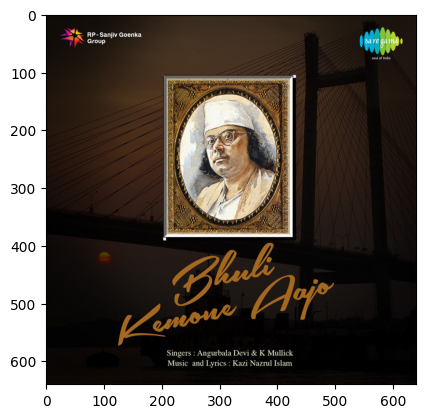

In [ ]:
image = io.imread(aa)
plt.imshow(image)
plt.show()